In [1]:
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

## 1. Develop yourself using `numpy` library: 
### a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables `f(x,y)`.

> **Algorithm 8.2 Stochastic gradient descent (SCD) with momentum** 
>
> **Require:** Learning rate $\epsilon$, momentum parameter $a$
>
> **Require:** Initial parameter $\theta$, initial velocity $v$ 
>
> while stopping criterion not met do
>
>    Sample a minibatch of in examples from the training set {$x^{(1)}, ..., x^{(m)}$} 
> corresponding targets $y^{(i)}$. 
> Compute gradient estimate: 
> Compute velocity update: v < ay — 
> Apply update: 0 < 0 + V. > end while 

> [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)
> 
> [Code Adam Optimization Algorithm From Scratch](https://machinelearningmastery.com/adam-optimization-from-scratch/)

In [2]:
def differentiableFunc(x, y):
    return 1 / (1 + x ** 2) + 1 / (1 + y ** 2)


x_values = np.arange(-10, 10, 0.1)
y_values = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_values, y_values)
Z = differentiableFunc(X, Y)

In [3]:
fig = go.Figure(data=[go.Surface(x=X,y=Y,z=Z)])

fig.update_layout(
    title="Function to Differentiate",
    autosize=False,
    width=500, 
    height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

Partial derivative with respect to x


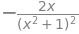

In [4]:
from sympy import *
x, y, z = symbols("x y z")

init_printing(use_unicode=True)
print(f"Partial derivative with respect to x")
diff(1 / (1 + x ** 2) + 1 / (1 + y ** 2), x)

Partial derivative with respect to y


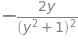

In [5]:
print(f"Partial derivative with respect to y")
diff(1 / (1 + x ** 2) + 1 / (1 + y ** 2), y)

In [6]:
def dfdx(x, y):
    return - (2*x / (x ** 2 + 1) ** 2)

def dfdy(x, y):
    return - (2*y / (y ** 2 + 1) ** 2)

# gradient vector [df/dx, df/dy]
def grad_vector(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)])

### Gradient descent with momentum
This is a method that helps accelerate GD in the relevant direction and suppresses oscillations. It implies adding a fraction $β$ of the previous vector adding the fraction 
$( 1 − β )$ of the upcoming gradient. This approach is called "exponential moving average":

$V_t = β V_{t − 1} + ( 1 − β ) g_t \\ θ_t := θ_{t − 1} − η V_t$
, where $g_t$ - is the current gradient, $η$ - learning rate.

$β$ is usually set to $0.9$.

In [215]:
# implementationOfGradientDescentWithMomentum() - is hand written Momentum that is an extension to the gradient descent 
#   optimization algorithm that allows the search to build inertia in a direction in the search space and
#   overcome the oscillations of noisy gradients and coast across flat spots of the search space.
def implementationOfGradientDescentWithMomentum(thetaPrev, beta=0.9, learning_rate=1e-1):
    epsilon = 0.0001
    grad_itter = 1
    seq_x = []
    seq_y = []
    differenceCurr = []
    differencePrev = []

    # First iteration we dont have any beta * vPrev
    vCurr =  (1 - beta) * grad_vector(thetaPrev[0], thetaPrev[1])
    thetaCurr = np.subtract(thetaPrev, learning_rate * grad_vector(thetaPrev[0], thetaPrev[1]))
    seq_x = np.append(seq_x, thetaCurr[0])
    seq_y = np.append(seq_y, thetaCurr[1])

    # values = np.subtract(thetaCurr[0], thetaPrev[0])
    differenceCurr = np.append(differenceCurr, np.subtract(thetaCurr[0], thetaPrev[0]))
    differencePrev = np.append(differencePrev, np.subtract(thetaCurr[1], thetaPrev[1]))

    while np.linalg.norm(np.subtract(thetaCurr, thetaPrev)) > epsilon:
        vPrev, thetaPrev = vCurr, thetaCurr
        # Rest if iterations follow the above formula
        vCurr =  beta * vPrev + (1 - beta) * grad_vector(thetaPrev[0], thetaPrev[1])
        thetaCurr = beta * thetaPrev + (1 - beta) * grad_vector(thetaPrev[0], thetaPrev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, thetaCurr[0])
        seq_y = np.append(seq_y, thetaCurr[1])
        differenceCurr = np.append(differenceCurr, np.subtract(thetaCurr[0], thetaPrev[0]))
        differencePrev = np.append(differencePrev, np.subtract(thetaCurr[1], thetaPrev[1]))
    
    return (thetaCurr, grad_itter, seq_x, seq_y, differenceCurr, differencePrev)

### b) python function for implementation of ADAM optimization algorithm for the function of two variables `f(x,y)`.

**Algorithm 8.7 The Adam algorithm**
```pseudo

Require: Step size ε (Suggested default: 0.001)
Require: Exponential decay rates for moment estimates, p1 and p2 in [0, 1). (Suggested defaults: 0.9 and 0.999 respectively) 
Require: Small constant δ - used for numerical stabilization (Suggested default: 10^-8) 
Require: Initial parameters θ
    Initialize 1st and 2nd moment variables s = 0, r = 0 
    Initialize time step t = 0 
    while stopping criterion not met do
        Sample a minibatch of m, exaniples from the training set {x(1) ,..., x(m), with corresponding targets y(i). 
        Compute gradient: g ← (1 / m) ∇θ Sum(L[f(x(i), θ), y(i))
        Update biased first moment estimate: s ← p_1 * s + (1 - p_1)g 
        Update biased second moment estimate: r ← p_2 * r + (1 - p_2) g ∗ g
        Correct bias in first moment: s' ← s / (1 - p_1')
        Correct bias in second moment: r' ← r / (1 - p_2')
        Compute update: Δθ - (operations applied element-wise)
        Apply update: θ ← θ + Δθ
    end while
```

### Adam
Adam (Adaptive momentum algorithm) combines momentum and RMSprop approaches:
- computes adaptive learning rates;
- storing an exponentially moving average of past squared gradients
- and uses scaling of the gradients:
$V^{corr}_t = \dfrac{V_t}{1 − β^t}$

Parameters:
- $η$ - learning rate 
- β_1 = 0.9
- β_2 = 0.999
- ϵ = 10−8

The moving averages of past and past squared gradients $V_t$ and $S_t$ respectively are computed as follows:

$V_t = β_1 V_{t − 1} + ( 1 − β_1 ) g_t \\ S_t = β_2 S_{t − 1} + ( 1 − β_2 ) g^2_t$

Adam update rule for the model weights:

$θ_t + 1 = θ_t − \dfrac{η}{\sqrt{S^{corr}_t}+ ϵ}  V_t$ 

In [216]:
# implementationOfADAM() - is hand written The Adam optimization algorithm that is an extension 
#   to stochastic gradient descent that has recently seen broader adoption 
#   for deep learning applications in computer vision and natural language processing.
def implementationOfADAM(thetaPrev, ksi=10e-8, beta_1=0.9, beta_2=0.999, learning_rate=1e-1):
    epsilon = 0.0001
    grad_itter = 1
    seq_x = []
    seq_y = []
    differenceCurr = []
    differencePrev = []

    # First iteration we dont have any beta * vPrev
    vCurr = (1 - beta_1) * grad_vector(thetaPrev[0], thetaPrev[1])
    sCurr = (1 - beta_2) * np.power(grad_vector(thetaPrev[0], thetaPrev[1]), 2)
    thetaCurr = np.subtract(thetaPrev, learning_rate * vCurr)

    seq_x = np.append(seq_x, thetaCurr[0])
    seq_y = np.append(seq_y, thetaCurr[1])
    differenceCurr = np.append(differenceCurr, np.subtract(thetaCurr[0], thetaPrev[0]))
    differencePrev = np.append(differencePrev, np.subtract(thetaCurr[1], thetaPrev[1]))

    while np.linalg.norm(np.subtract(thetaCurr, thetaPrev)) > epsilon:
        vPrev, sPrev, thetaPrev = vCurr, sCurr, thetaCurr
        # Formula
        vCurr = beta_1 * vPrev + (1 - beta_1) * grad_vector(thetaPrev[0], thetaPrev[1])
        sCurr = beta_2 * sPrev + (1 - beta_2) * np.power(grad_vector(thetaPrev[0], thetaPrev[1]), 2)
        thetaCurr = np.subtract(thetaPrev, learning_rate / (np.sqrt(sCurr) + ksi)) * vCurr
        
        grad_itter += 1
        
        seq_x = np.append(seq_x, thetaCurr[0])
        seq_y = np.append(seq_y, thetaCurr[1])
        differenceCurr = np.append(differenceCurr, np.subtract(thetaCurr[0], thetaPrev[0]))
        differencePrev = np.append(differencePrev, np.subtract(thetaCurr[1], thetaPrev[1]))

    return (thetaCurr, grad_itter, seq_x, seq_y, differenceCurr, differencePrev)

## 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [9]:
startX = np.random.uniform(-10, 10)
startY = np.random.uniform(-10, 10)

In [217]:
theta_SGD, iterations_SGD, slice_X_SGD, slice_Y_SGD, differenceCurr_SGD, differencePrev_SGD = implementationOfGradientDescentWithMomentum(np.array([startX, startY]))

In [218]:
theta_SGD

array([-1.64898682e-04, 1.89579949e-07])

In [223]:
iterations_SGD

In [219]:
theta_ADAM, iterations_ADAM, slice_X_ADAM, slice_Y_ADAM, differenceCurr_ADAM, differencePrev_ADAM = implementationOfADAM(np.array([startX, startY]))

In [220]:
theta_ADAM

array([-0.00202264, 0.08548539])

In [224]:
iterations_ADAM

## 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution `(x_next – x_prev)` on the iteration number `N` or in the form of 2D-plane graph.

In [174]:
def contourPlot(x, y, x_seq, y_seq, Algorithm):
    X, Y = np.meshgrid(x, y)
    Z = differentiableFunc(X, Y)

    fig = go.Figure(data=
        go.Contour(z=Z, x=x, y=y, contours_coloring="lines")
    )

    fig.add_trace(
        go.Scatter(x=x_seq, y=y_seq, mode='markers')
    )\
        .update_traces(line_color="blue")
    fig.update_layout(title_text=Algorithm)

    fig.show()

In [210]:
def differencePlot(diffCurr, diffPrev, title):
    fig = go.Figure(go.Scatter(y=diffCurr, name="Curr"))
    fig.add_scatter(y=diffPrev, name="Prev")
    fig.update_layout(title_text=title)
    fig.show()

In [221]:
contourPlot(x_values, y_values, slice_X_SGD, slice_Y_SGD, "SGD with Momentum")

In [212]:
differencePlot(differenceCurr_SGD, differencePrev_SGD, "SGD: curr – prev")

In [222]:
contourPlot(x_values, y_values, slice_X_ADAM, slice_Y_ADAM, "ADAM")

In [211]:
differencePlot(differenceCurr_ADAM, differencePrev_ADAM, "ADAM: curr – prev")

## 4. Write a conclusions about the accuracy of the implemented algorithms.

As a result of lab two popular optimization algorithms were implemented. `ADAM` optimizer showed the best performance in minimizing function of two variables in comparison to `SGD` with momentum:

|Algorithm|x|y|
|:----:|:----:|:----:|
|SGDM|$0.00016489868161408892$|$1.8957994850784628e-07$|
|ADAM|$-0.002022641868597668$|$0.08548539007161324$|

Despite the algorithm precision the time complexities of them are poly different with the constant for fully convergance SGD took only 36 iterations, but ADAM 653 took which slower.

|Algorithm|Iterations| Big O|
|:-----:|:------:|:----:|
|SGDM|$36$|$O({\sqrt{N}})$|
|ADAM|$653$|$O(N)$|